In [150]:
df_finance = pd.read_csv('/kaggle/input/startup-failures/Startup Failure (Finance and Insurance).csv', on_bad_lines='skip') 
df_food = pd.read_csv('/kaggle/input/startup-failures/Startup Failure (Food and services).csv', on_bad_lines='skip')
df_health = pd.read_csv('/kaggle/input/startup-failures/Startup Failure (Health Care).csv', on_bad_lines='skip')
df_production = pd.read_csv('/kaggle/input/startup-failures/Startup Failure (Manufactures).csv', on_bad_lines='skip')
df_commerce = pd.read_csv('/kaggle/input/startup-failures/Startup Failure (Retail Trade).csv', on_bad_lines='skip')
df_media = pd.read_csv('/kaggle/input/startup-failures/Startup Failures (Information Sector).csv', on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/startup-failures/Startup Failure (Finance and Insurance).csv'

In [148]:
df = pd.concat(dfs, ignore_index=True)

ValueError: No objects to concatenate

In [101]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('punkt', download_dir='C:\\Users\\Phong\\AppData\\Roaming\\nltk_data')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
url = "https://raw.githubusercontent.com/whosphong/Ai_Startup_Failure--UAMATH509/refs/heads/main/Startup%20Failure%20(Finance%20and%20Insurance).csv"
data_org = pd.read_csv(url)

In [4]:
data_org

,Name,Sector,Years of Operation,What They Did,How Much They Raised (Millions),Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,Online personal loans,655.0,LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,2.0,PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,3.0,Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,500.0,Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,11.0,Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0
5,Clinkle,Finance and Insurance,2011-2016,Mobile wallet,30.0,No product vs Apple Pay/PayPal,Execution over promises,1,0,1,0,0,0,0,0,1,0,0,0,1.0
6,Coinbase NFT,Finance and Insurance,2021-2023,NFT marketplace,0.0,OpenSea and NFT crash,NFTs need timing,1,0,1,0,0,0,0,0,0,1,0,0,0.0
7,FundersClub,Finance and Insurance,2012-2022,Crowdfunding for startups,20.0,Kickstarter and low ROI,Crowdfunding needs hits,1,0,1,0,0,0,1,0,0,0,0,0,0.0
8,Fuze Network,Finance and Insurance,2010-2016,Prepaid card payments,5.0,Green Dot and small scale,Prepaid needs reach,1,0,1,0,0,0,0,1,0,0,0,0,0.0
9,Indiegogo Life,Finance and Insurance,2014-2019,Personal crowdfunding,10.0,GoFundMe and niche focus,Personal funding needs appeal,1,0,1,1,0,0,0,1,0,0,0,0,0.0


In [5]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             47 non-null     object 
 1   Sector                           47 non-null     object 
 2   Years of Operation               47 non-null     object 
 3   What They Did                    47 non-null     object 
 4   How Much They Raised (Millions)  47 non-null     float64
 5   Why They Failed                  47 non-null     object 
 6   Takeaway                         47 non-null     object 
 7   Giants                           47 non-null     int64  
 8   No Budget                        47 non-null     int64  
 9   Competition                      47 non-null     int64  
 10  Poor Market Fit                  47 non-null     int64  
 11  Acquisition Stagnation           47 non-null     int64  
 12  Platform Dependency     

In [6]:
def calculate_years(yr_range):
    start_year, end_year = map(int, yr_range.split('-'))
    return end_year - start_year
data_org['Years of Operation'] = data_org['Years of Operation'].apply(calculate_years)
data_org['Sector'].unique()
data_org.drop(columns='Sector', inplace = True)
data_org.drop(columns='Name', inplace = True)

In [ ]:
def clean_failure_reason(text):
    # Remove the patterns like "Shut down ####", "Closed ####", "Faded ####", "Acquired ####", etc.
    text = re.sub(r'\b(Shut down|Closed|Faded|Acquired) \d{4}\b', '', text)
    
    # Remove any additional semi-colons that might be left after removing the above phrases
    text = re.sub(r'\s*;\s*', '; ', text)  # Normalize semi-colon spacing
    text = re.sub(r'\s*;\s*$', '', text)  # Remove trailing semi-colon if any
    text = re.sub(r'^\s*;\s*', '', text)  # Remove leading semi-colon if any
    
    # If there are multiple semi-colons in a row, collapse them into one
    text = re.sub(r';\s*;', ';', text)
    
    # Remove any extra spaces that might remain after removal
    text = text.strip()
    
    return text

# Apply this function to the "Why they Failed" column
df['Why they Failed'] = df['Why they Failed'].apply(lambda x: clean_failure_reason(str(x)))

In [ ]:
# Define the function to replace semicolons with " and "
def replace_semicolons(text):
    # Replace semicolons with " and "
    return re.sub(r';', ' and ', text)

# Apply this function to the specific column
df['Why they Failed'] = df['Why they Failed'].apply(lambda x: replace_semicolons(str(x)))

# Verify the changes
print(df['Why they Failed'].head())  # Print first few rows to check the results

In [ ]:
# Define the function to remove quotation marks
def remove_quotation_marks(text):
    # Remove all quotation marks
    return re.sub(r'"', '', text)

# Apply this function to the specific column
df['Why they Failed'] = df['Why they Failed'].apply(lambda x: remove_quotation_marks(str(x)))

# Verify the changes
print(df['Why they Failed'].head())  # Print first few rows to check the results

In [7]:
data_org.isnull().sum()

Years of Operation                 0
What They Did                      0
How Much They Raised (Millions)    0
Why They Failed                    0
Takeaway                           0
Giants                             0
No Budget                          0
Competition                        0
Poor Market Fit                    0
Acquisition Stagnation             0
Platform Dependency                0
Monetization Failure               0
Niche Limits                       0
Execution Flaws                    0
Trend Shifts                       0
Toxicity/Trust Issues              0
Regulatory Pressure                0
Overhype                           1
dtype: int64

In [8]:
data_org.dropna(inplace=True)

In [9]:
data_org.duplicated().sum()

np.int64(0)

In [10]:
data_org.describe()

,Years of Operation,How Much They Raised (Millions),Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
count,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,7.630435,103.823913,0.956522,0.065217,1.0,0.239130,0.260870,0.0,0.021739,0.195652,0.065217,0.043478,0.065217,0.065217,0.021739
std,3.288760,212.061353,0.206185,0.249637,0.0,0.431266,0.443961,0.0,0.147442,0.401085,0.249637,0.206185,0.249637,0.249637,0.147442
min,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.500000,13.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.750000,73.750000,1.000000,0.000000,1.0,0.000000,0.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1000.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
columns_to_log_transform = ['Years of Operation', 'How Much They Raised (Millions)']
log_transformed_columns = np.log1p(data_org[columns_to_log_transform])  # Apply log(1 + x) transformation
log_transformed_columns_df = pd.DataFrame(log_transformed_columns, columns=columns_to_log_transform)
data_dropped = data_org.drop(columns=columns_to_log_transform)
data = pd.concat([data_dropped.reset_index(drop=True), log_transformed_columns_df.reset_index(drop=True)], axis=1)


In [66]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-z\s]', '', text.lower())  # Remove non-alphabetical characters
    words = word_tokenize(text)  # Tokenize the text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

# Apply preprocessing to the relevant columns in your dataset (excluding 'Takeaway')
data['What They Did'] = data['What They Did'].apply(preprocess_text)
data['Why They Failed'] = data['Why They Failed'].apply(preprocess_text)

In [68]:
vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features if needed
X_what_they_did = vectorizer.fit_transform(data['What They Did'])
X_why_they_failed = vectorizer.fit_transform(data['Why They Failed'])

# Convert the sparse matrix to DataFrame
text_features_what = pd.DataFrame(X_what_they_did.toarray(), columns=vectorizer.get_feature_names_out())
text_features_failed = pd.DataFrame(X_why_they_failed.toarray(), columns=vectorizer.get_feature_names_out())

numerical_features = data[['Years of Operation', 'How Much They Raised (Millions)', 
                           'Giants', 'No Budget', 'Competition', 'Poor Market Fit', 
                           'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure',
                           'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
                           'Regulatory Pressure', 'Overhype']]

# Reset the index of all feature DataFrames
text_features_what = text_features_what.reset_index(drop=True)
text_features_failed = text_features_failed.reset_index(drop=True)
numerical_features = numerical_features.reset_index(drop=True)

features_what = pd.concat([text_features_what, numerical_features], axis=1)
features_failed = pd.concat([text_features_failed, numerical_features], axis=1)

# 1

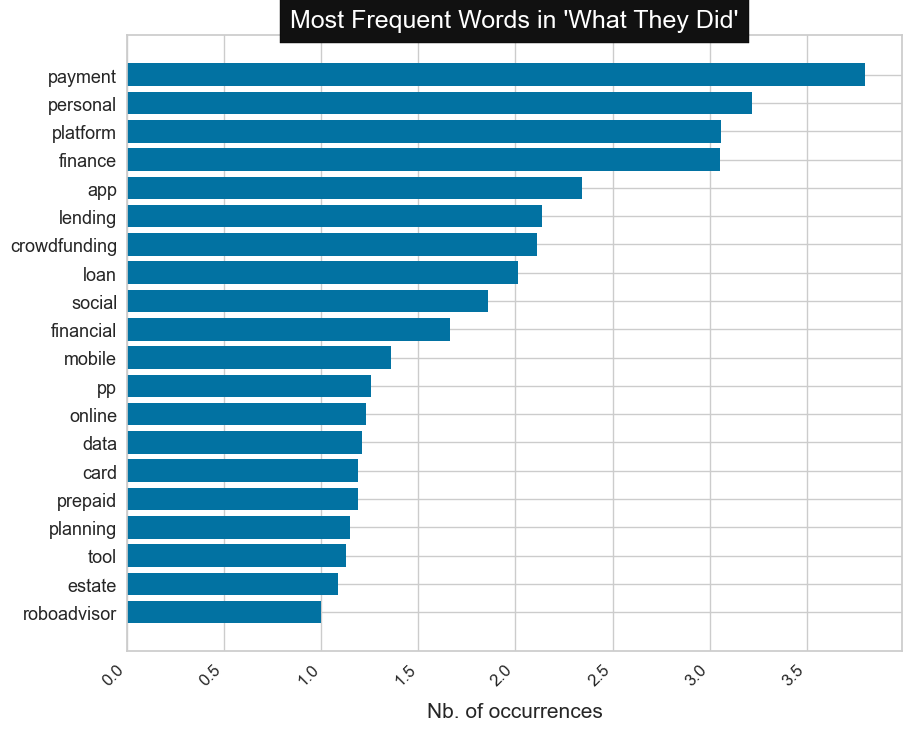

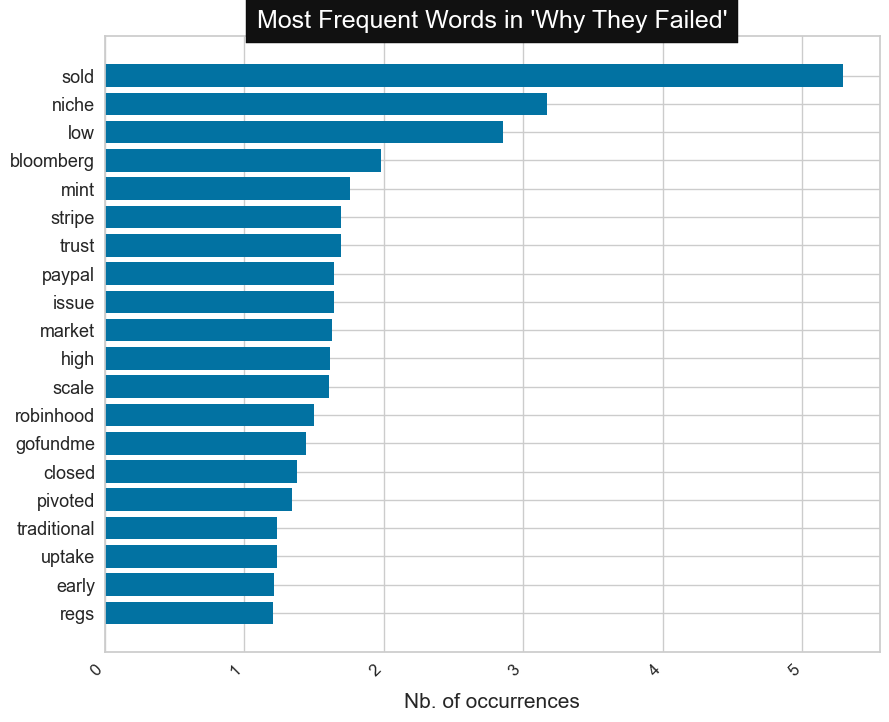

In [69]:
# Function to plot most frequent words in a given column
def plot_most_frequent_words(text_column, title):
    # Use TfidfVectorizer to count the frequency of each word
    vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
    X = vectorizer.fit_transform(data[text_column])
    word_freq = X.toarray().sum(axis=0)  # Sum the occurrences across all samples
    
    # Get the words and their corresponding frequencies
    words = vectorizer.get_feature_names_out()
    word_counts = dict(zip(words, word_freq))
    
    # Sort the words by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Prepare the data for plotting
    N = 20  # Top N most frequent words to display
    sorted_word_counts_top = sorted_word_counts[:N]
    x_axis = [item[0] for item in sorted_word_counts_top]
    y_axis = [item[1] for item in sorted_word_counts_top]
    
    # Plotting the top N most frequent words
    plt.rc('font', weight='normal')
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=13)
    ax.barh(x_axis, y_axis, align='center')
    ax.invert_yaxis()  # Invert y-axis to show the highest frequency word at the top
    plt.xlabel("Nb. of occurrences", fontsize=15, labelpad=10)
    plt.title(title, bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=18)
    plt.show()

# Plot most frequent words for "What They Did"
plot_most_frequent_words('What They Did', "Most Frequent Words in 'What They Did'")

# Plot most frequent words for "Why They Failed"
plot_most_frequent_words('Why They Failed', "Most Frequent Words in 'Why They Failed'")

Elbow Method to determine the number of clusters to be formed:


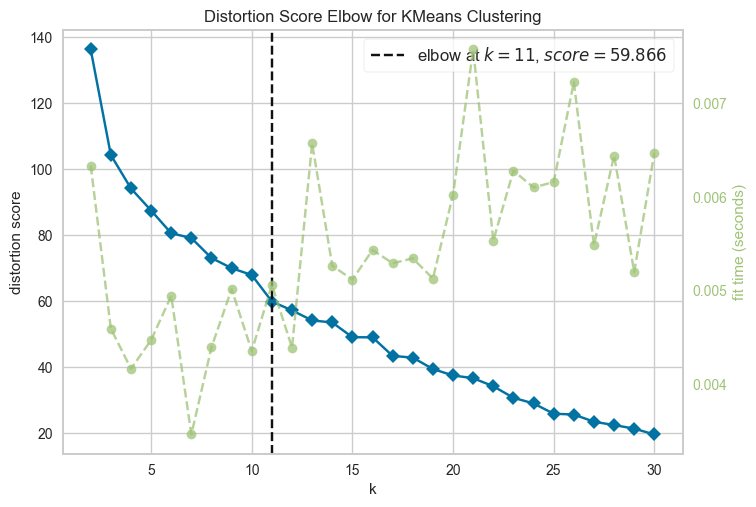

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Step 1: Use the Elbow Method with KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)  # Try different k values (up to 30)
Elbow_M.fit(features_what)  # Fit the PCA-transformed data to the Elbow Visualizer
Elbow_M.show()  # Show the plot to determine the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


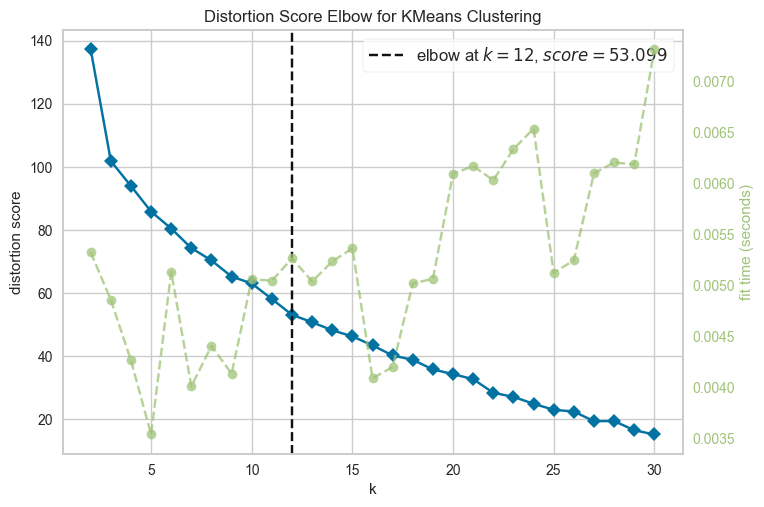

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
# Step 1: Use the Elbow Method with KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)  # Try different k values (up to 30)
Elbow_M.fit(features_failed)  # Fit the PCA-transformed data to the Elbow Visualizer
Elbow_M.show()  # Show the plot to determine the optimal number of clusters

In [ ]:
kmeans_what = KMeans(n_clusters=11, random_state=42)  # Adjust the number of clusters as needed
data['Cluster_What'] = kmeans_what.fit_predict(features_what)

# Check the distribution of clusters
print("Cluster distribution for 'What They Did':")
print(data['Cluster_What'].value_counts())

kmeans_failed = KMeans(n_clusters=12, random_state=42)  # Adjust the number of clusters as needed
data['Cluster_Failed'] = kmeans_failed.fit_predict(features_failed)

# Check the distribution of clusters
print("Cluster distribution for 'Why They Failed':")
print(data['Cluster_Failed'].value_counts())

Cluster distribution for 'What They Did':
Cluster_What
7    10
1     8
8     7
5     7
2     4
3     3
4     3
0     2
6     1
9     1
Name: count, dtype: int64
Cluster distribution for 'Why They Failed':
Cluster_Failed
3    11
1    10
2     9
5     8
0     4
4     3
6     1
Name: count, dtype: int64


In [20]:
for cluster in range(data['Cluster_What'].nunique()):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster_What'] == cluster]
    
    # Get the most common failure reasons
    failure_reasons = cluster_data['What They Did'].value_counts().head(5)
    print("Most common failure reasons:")
    print(failure_reasons)


Cluster 0:
Most common failure reasons:
What They Did
mobile payment platform    1
financial planning tool    1
supply chain finance       1
aidriven lending           1
ai underwriting loan       1
Name: count, dtype: int64

Cluster 1:
Most common failure reasons:
What They Did
online personal loan      1
international transfer    1
Name: count, dtype: int64

Cluster 2:
Most common failure reasons:
What They Did
personal finance app       3
micropayments platform     1
portfolio tracking tool    1
mobile wallet              1
nft marketplace            1
Name: count, dtype: int64

Cluster 3:
Most common failure reasons:
What They Did
pp lending platform    1
Name: count, dtype: int64

Cluster 4:
Most common failure reasons:
What They Did
crypto payment stablecoin    1
Name: count, dtype: int64

Cluster 5:
Most common failure reasons:
What They Did
loan subprime borrower    1
biometric payment         1
Name: count, dtype: int64


In [21]:
for cluster in range(data['Cluster_Failed'].nunique()):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['Cluster_Failed'] == cluster]
    
    # Get the most common failure reasons
    failure_reasons = cluster_data['Why They Failed'].value_counts().head(5)
    print("Most common failure reasons:")
    print(failure_reasons)


Cluster 0:
Most common failure reasons:
Why They Failed
square mismanagement      1
nerdwallet slow growth    1
coupa sold                1
bank high default         1
upstart regs              1
Name: count, dtype: int64

Cluster 1:
Most common failure reasons:
Why They Failed
lendingclub high default    1
paypal high cost            1
Name: count, dtype: int64

Cluster 2:
Most common failure reasons:
Why They Failed
stripe sold                2
paypal low adoption        1
mint sold tradeking        1
mintacorns sold goldman    1
opensea nft crash          1
Name: count, dtype: int64

Cluster 3:
Most common failure reasons:
Why They Failed
bank trust issue    1
Name: count, dtype: int64

Cluster 4:
Most common failure reasons:
Why They Failed
coinbase market shift    1
Name: count, dtype: int64

Cluster 5:
Most common failure reasons:
Why They Failed
regulatory fine opploans competition    1
paypal tech issue                       1
Name: count, dtype: int64


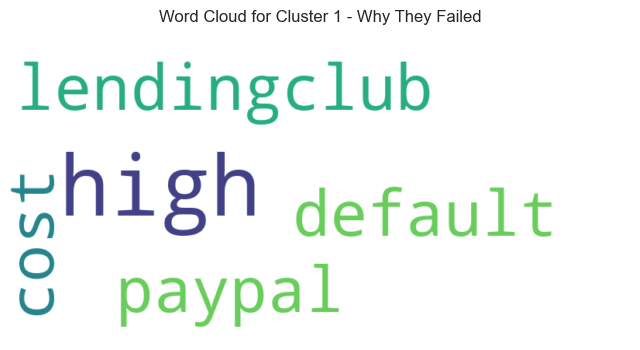

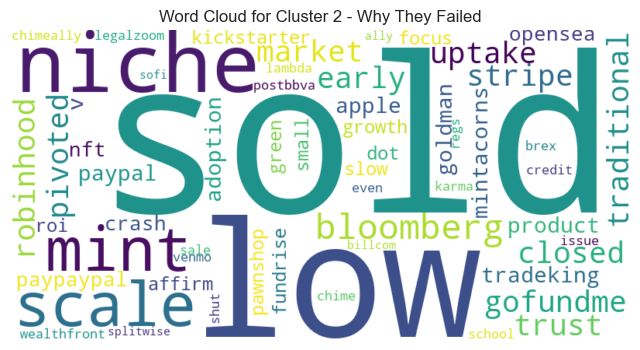

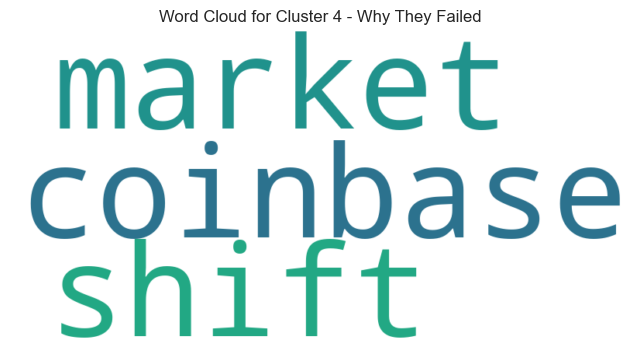

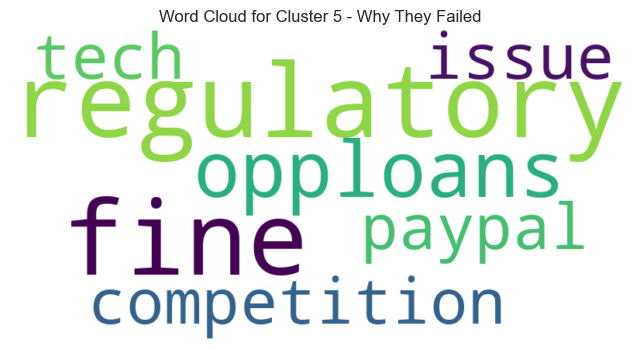

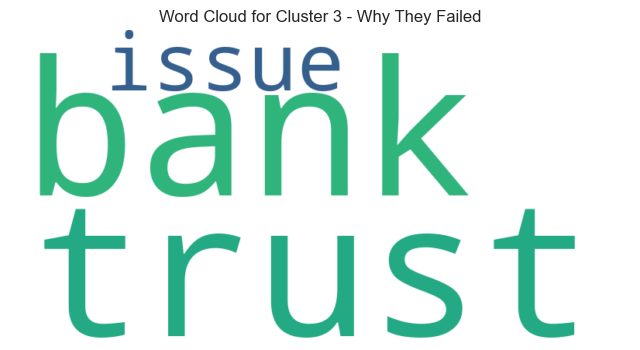

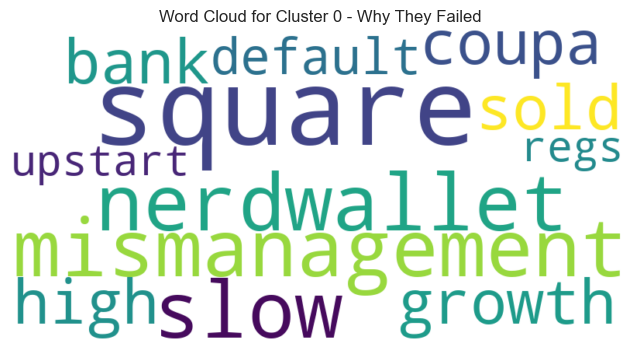

In [20]:
# Loop through each cluster and generate a word cloud for the "Why They Failed" column
for cluster_num in data['Cluster_Failed'].unique():
    cluster_text = " ".join(data[data['Cluster_Failed'] == cluster_num]['Why They Failed'])  # Get the text for the cluster
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.title(f'Word Cloud for Cluster {cluster_num} - Why They Failed')
    plt.show()

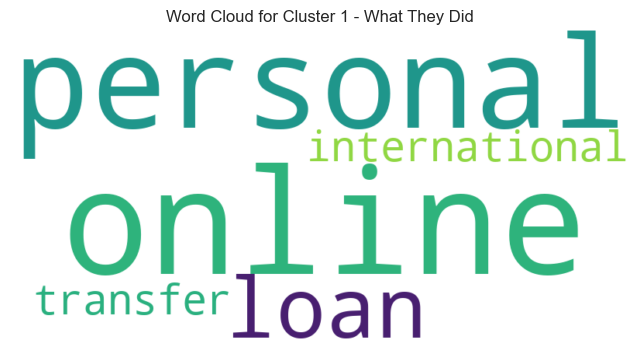

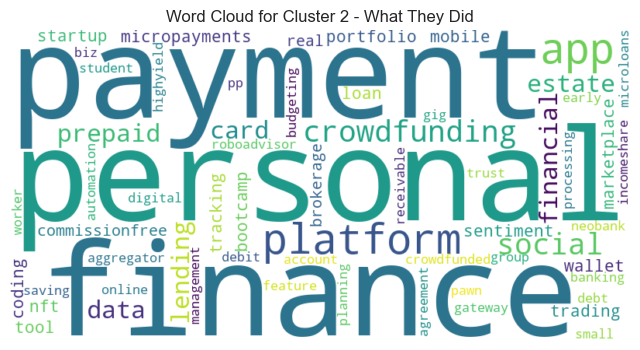

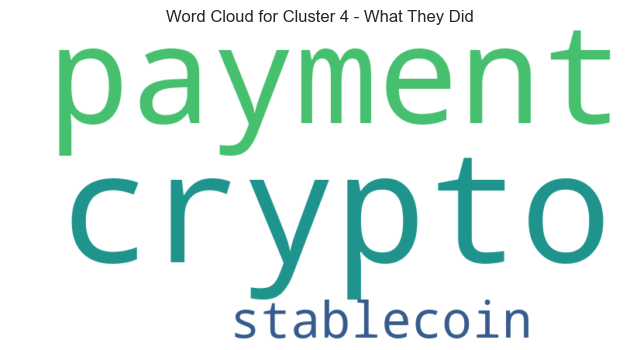

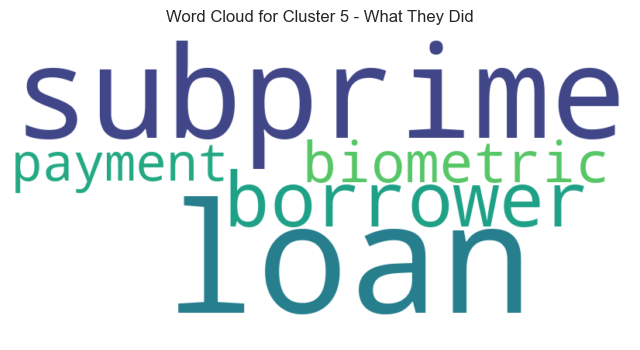

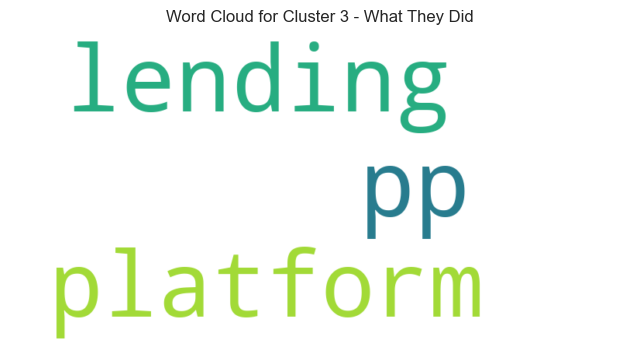

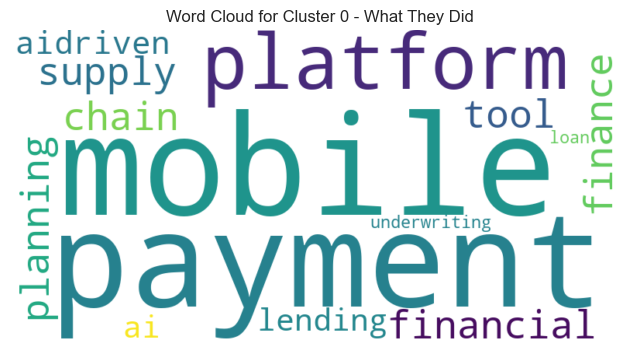

In [42]:
# Loop through each cluster and generate a word cloud for the "Why They Failed" column
for cluster_num in data['Cluster_What'].unique():
    cluster_text = " ".join(data[data['Cluster_What'] == cluster_num]['What They Did'])  # Get the text for the cluster
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.title(f'Word Cloud for Cluster {cluster_num} - What They Did')
    plt.show()

C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\2834802484.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


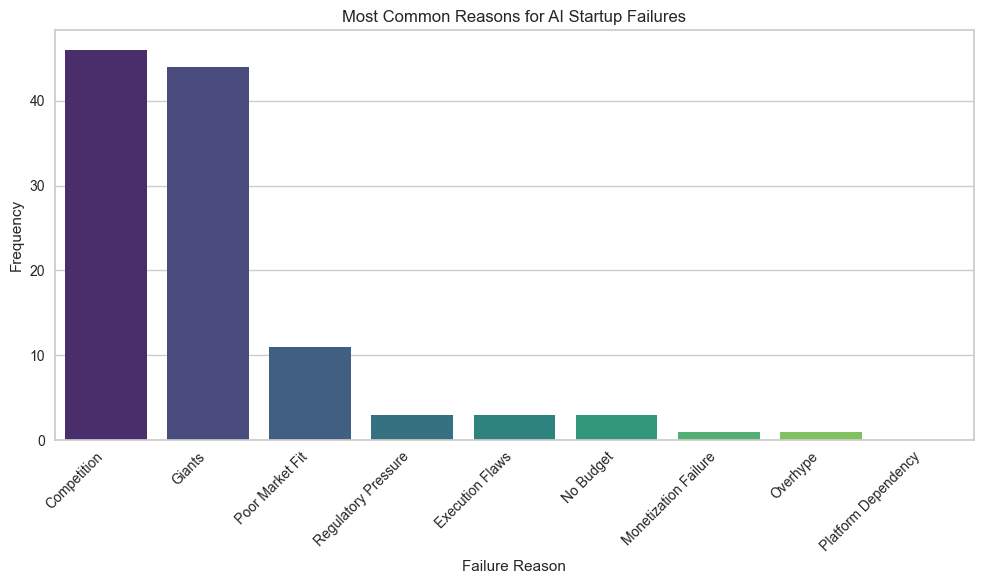

In [24]:

# List of failure-related columns from the dataset
failure_columns = [
    'Competition', 'Poor Market Fit', 'Monetization Failure', 
    'Execution Flaws', 'Platform Dependency', 'Regulatory Pressure', 
    'Overhype', 'Giants', 'No Budget'
]

# Sum the number of 1s (indicating failure) for each failure reason
failure_counts = data[failure_columns].sum()

# Sort the reasons by their frequency in descending order
failure_counts = failure_counts.sort_values(ascending=False)

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Failure Reason')
plt.ylabel('Frequency')
plt.title('Most Common Reasons for AI Startup Failures')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


Cluster 0:


C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


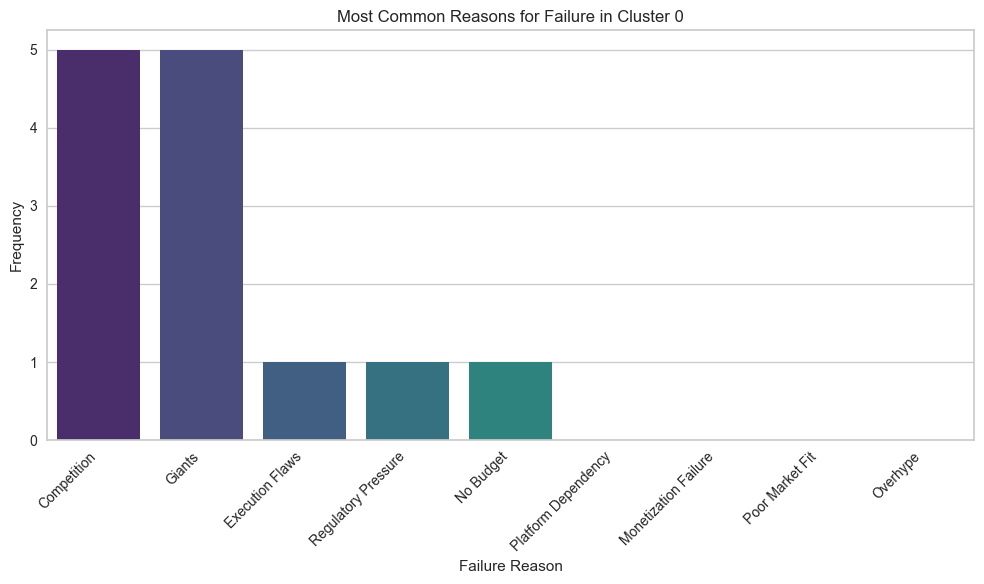

Cluster 1:


C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


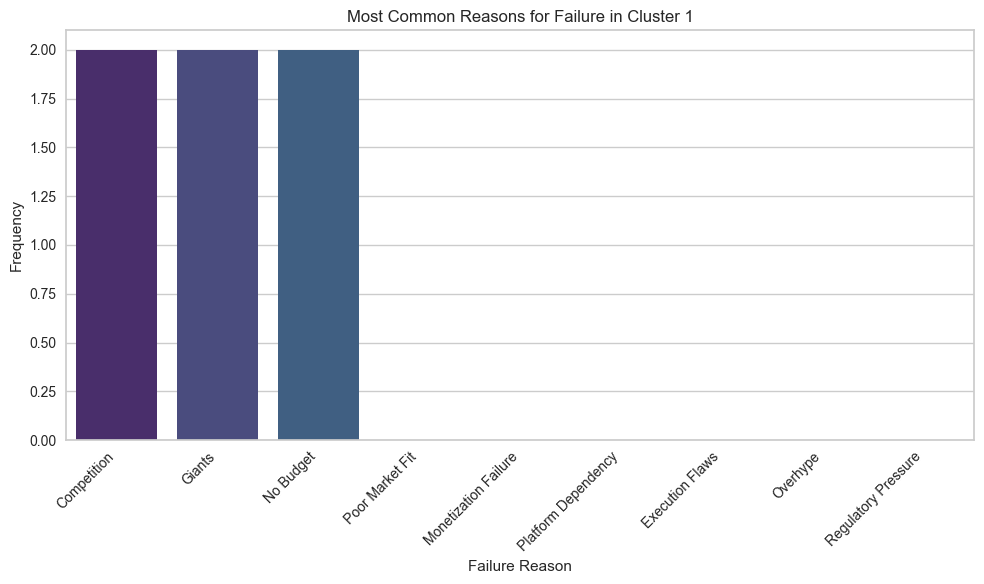

Cluster 2:


C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


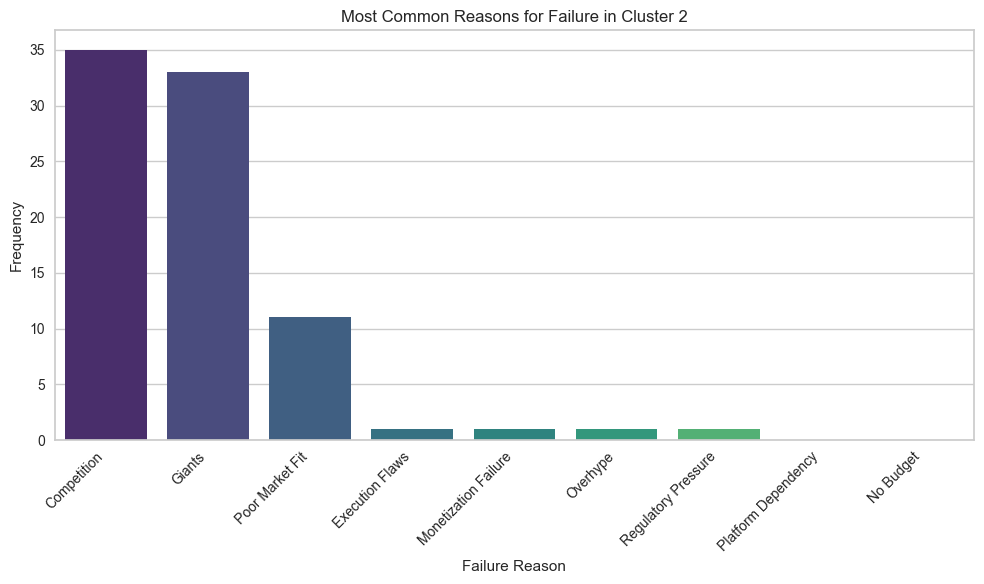

C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


Cluster 3:


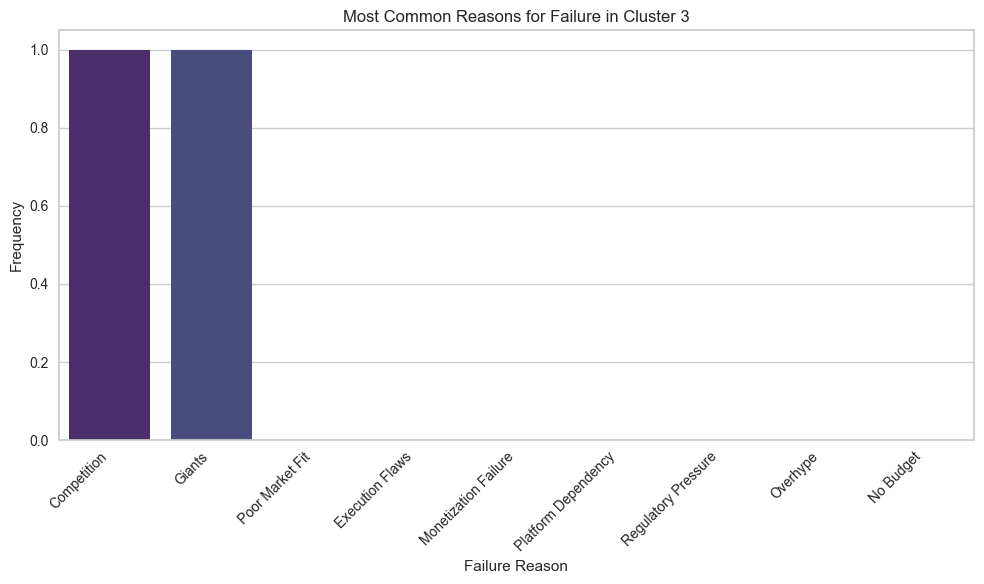

Cluster 4:


C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


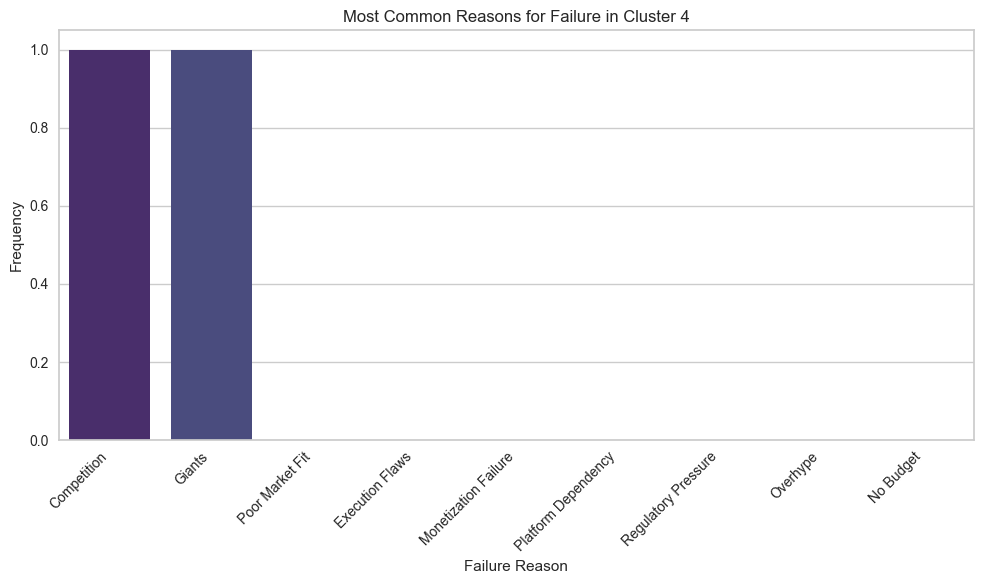

Cluster 5:


C:\Users\Phong\AppData\Local\Temp\ipykernel_84740\4190598620.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


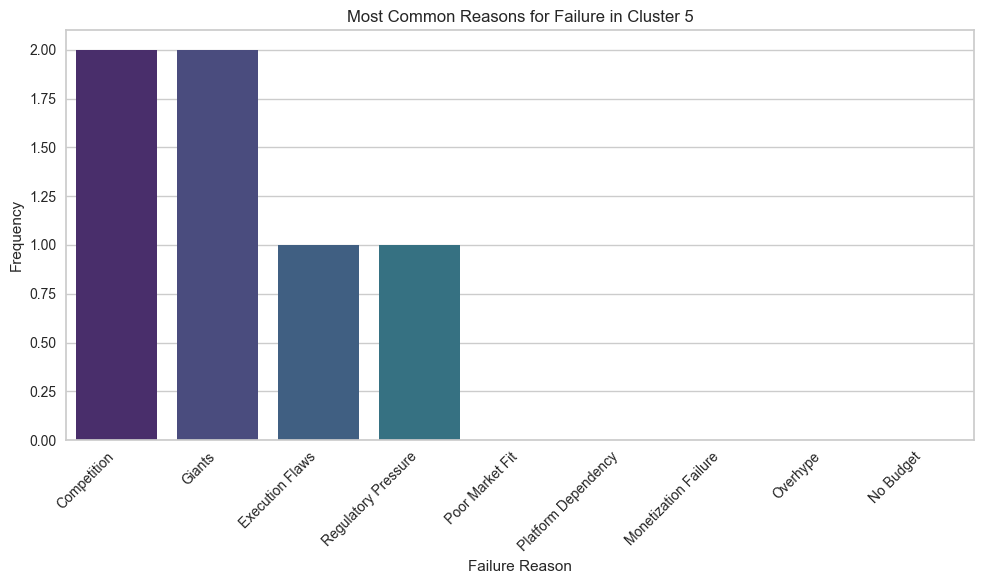

In [26]:
# List of failure-related columns from the dataset
failure_columns = [
    'Competition', 'Poor Market Fit', 'Monetization Failure', 
    'Execution Flaws', 'Platform Dependency', 'Regulatory Pressure', 
    'Overhype', 'Giants', 'No Budget'
]

# Now, we will iterate through each cluster and calculate failure counts
for cluster_num in range(data['Cluster_What'].nunique()):
    print(f"Cluster {cluster_num}:")
    
    # Filter the data for the current cluster
    cluster_data = data[data['Cluster_What'] == cluster_num]
    
    # Sum the number of 1s (indicating failure) for each failure reason
    failure_counts = cluster_data[failure_columns].sum()
    
    # Sort the reasons by their frequency in descending order
    failure_counts = failure_counts.sort_values(ascending=False)
    
    # Create a bar chart to visualize the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')
    
    # Add labels and title
    plt.xlabel('Failure Reason')
    plt.ylabel('Frequency')
    plt.title(f'Most Common Reasons for Failure in Cluster {cluster_num}')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# 2

consider "success" as Years of Operation: How long the startup survived before failure.

In [123]:
data_clean = data[['Years of Operation', 'How Much They Raised (Millions)','Giants', 'No Budget', 'Competition', 'Poor Market Fit', 
                        'Acquisition Stagnation', 'Platform Dependency', 'Monetization Failure',
                        'Niche Limits', 'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
                        'Regulatory Pressure', 'Overhype']]


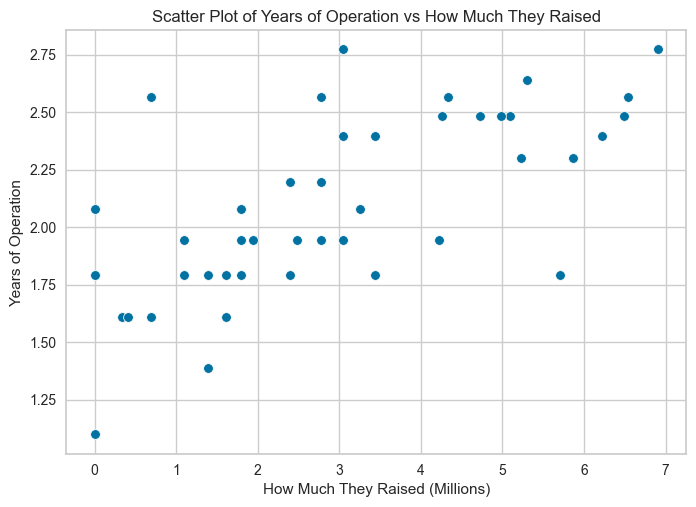

In [124]:
sns.scatterplot( x='How Much They Raised (Millions)', y='Years of Operation', data=data)
plt.ylabel('Years of Operation')
plt.xlabel('How Much They Raised (Millions)')
plt.title('Scatter Plot of Years of Operation vs How Much They Raised')
plt.show()

<Axes: xlabel='How Much They Raised (Millions)', ylabel='Years of Operation'>

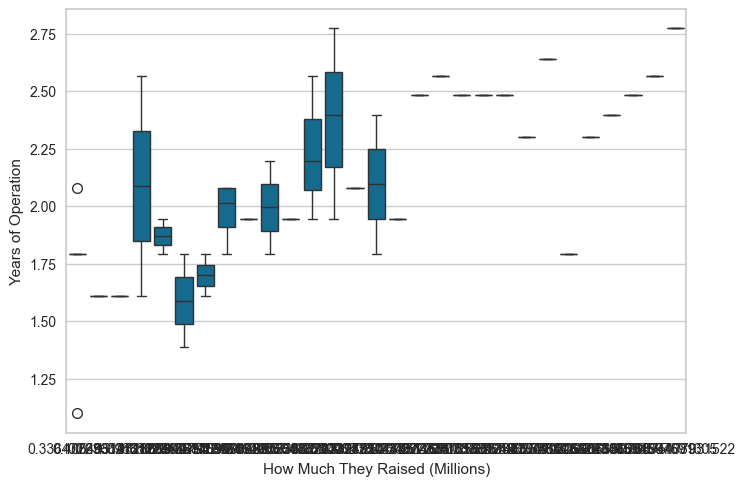

In [125]:
sns.boxplot(y='Years of Operation', x='How Much They Raised (Millions)', data=data)

In [128]:
correlation = data_clean[['How Much They Raised (Millions)', 'Years of Operation']].corr()
print(correlation)

                                 How Much They Raised (Millions)  \
How Much They Raised (Millions)                         1.000000   
Years of Operation                                      0.680577   

                                 Years of Operation  
How Much They Raised (Millions)            0.680577  
Years of Operation                         1.000000  


In [139]:
# Define features and target
X = data_clean[['How Much They Raised (Millions)', 'Giants', 'No Budget', 'Competition', 
                'Poor Market Fit', 'Acquisition Stagnation', 'Platform Dependency', 
                'Monetization Failure', 'Niche Limits', 'Execution Flaws', 
                'Trend Shifts', 'Toxicity/Trust Issues', 'Regulatory Pressure', 'Overhype']]  # Features
y = data_clean['Years of Operation']  # Target: Years of operation

# Initialize the model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print("Intercept (constant):", intercept)
print("Coefficients for each feature:")
feature_names = X.columns
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
print(coef_df)

Intercept (constant): 1.9857023670864553
Coefficients for each feature:
                                  Coefficient
How Much They Raised (Millions)  1.388843e-01
Giants                          -6.059980e-02
No Budget                       -2.468015e-01
Competition                     -1.110223e-16
Poor Market Fit                 -2.811704e-01
Acquisition Stagnation          -2.015138e-01
Platform Dependency              0.000000e+00
Monetization Failure             4.995643e-02
Niche Limits                    -9.014248e-02
Execution Flaws                 -6.371312e-01
Trend Shifts                    -6.085432e-01
Toxicity/Trust Issues            7.045793e-02
Regulatory Pressure             -3.352436e-01
Overhype                         2.686131e-02


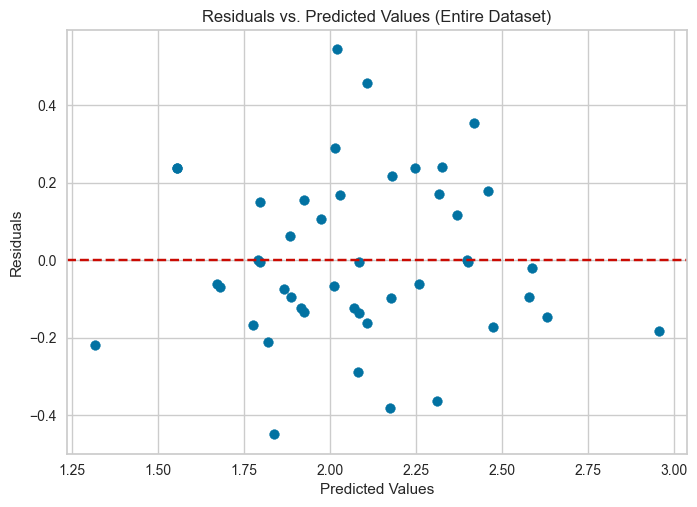

In [140]:
# Predict on the entire dataset (no test set in this case)
y_pred_all = model.predict(X)

# Calculate residuals
residuals_all = y - y_pred_all

# Plotting residuals
plt.scatter(y_pred_all, residuals_all)
plt.title('Residuals vs. Predicted Values (Entire Dataset)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y = 0 (ideal residuals)
plt.show()


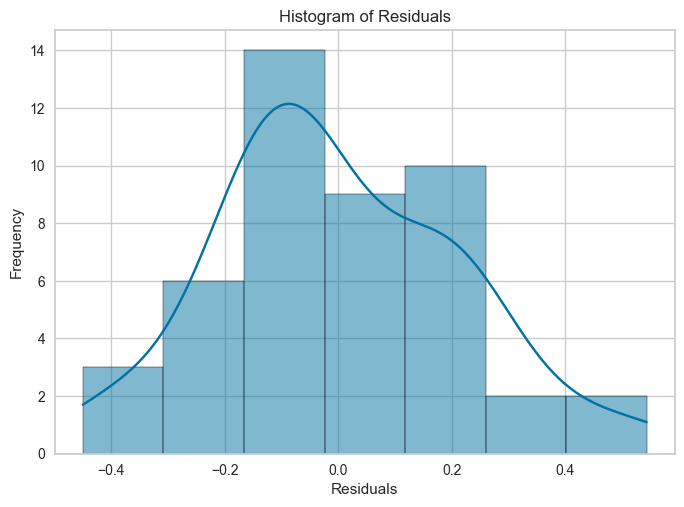

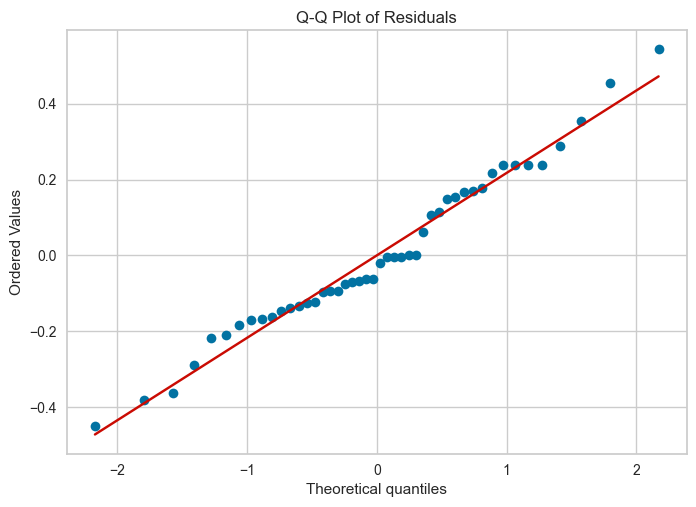

In [142]:
import seaborn as sns
import scipy.stats as stats

# Histogram of residuals
sns.histplot(residuals_all, kde=True)  # 'residuals_all' is for the entire dataset
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(residuals_all, dist="norm", plot=plt)  # 'residuals_all' is for the entire dataset
plt.title('Q-Q Plot of Residuals')
plt.show()

In [143]:
r_squared = model.score(X_train, y_train)
print(f"R-squared: {r_squared}")

R-squared: 0.6808509531137086


In [144]:
n = len(X_train)  # Number of data points
p = X_train.shape[1]  # Number of predictors (features)

# Calculate Adjusted R-squared
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squared}")


Adjusted R-squared: 0.4680849218561809


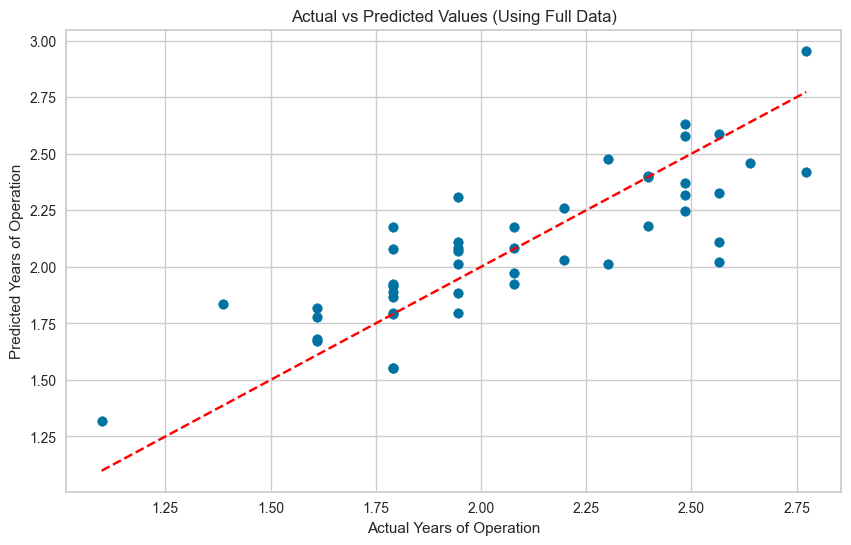

In [146]:
y_pred = model.predict(X)

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)  # Use 'y' for actual values (instead of y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Years of Operation')
plt.ylabel('Predicted Years of Operation')
plt.title('Actual vs Predicted Values (Using Full Data)')
plt.show()
